In [1]:
import os, glob
import copy
import numpy as np
import cv2
import matplotlib.pyplot as plt
import shutil

In [4]:
lecabA = "../../Data/CelebA/CelebA-HQ/celeba-256"
lecabAFILES    = [os.path.join(lecabA , i ) for i in os.listdir(lecabA )]
FFHQ = "../../Data/FFHQ"
FFHQfiles    = [os.path.join(FFHQ , i ) for i in os.listdir(FFHQ)]

In [12]:
os.mkdir("./testData")

In [13]:
for p in lecabAFILES[:5000]:
    shutil.copy(p, "./testData/")

In [1]:
import os
import torch.distributed as dist
import torch.multiprocessing as mp

def run(size, rank):
    print(size, rank)

def init_process(rank, size, fn, backend="gloo"):
    """Initialize the distributed environment."""
    os.environ["MASTER_ADDR"] = "127.0.0.1"
    os.environ["MASTER_PORT"] = "29500"
    dist.init_process_group(backend, rank=rank, world_size=size)
    fn(rank, size)


size = 4
processes = []
mp.set_start_method("spawn")
for rank in range(size):
    p = mp.Process(target=init_process, args=(rank, size, run))
    p.start()
    processes.append(p)

for p in processes:
    p.join()

Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/home/cvmi01/anaconda3/envs/rapids_torch/lib/python3.7/multiprocessing/spawn.py", line 105, in spawn_main
    exitcode = _main(fd)
  File "/home/cvmi01/anaconda3/envs/rapids_torch/lib/python3.7/multiprocessing/spawn.py", line 115, in _main
    self = reduction.pickle.load(from_parent)
AttributeError: Can't get attribute 'init_process' on <module '__main__' (built-in)>
Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/home/cvmi01/anaconda3/envs/rapids_torch/lib/python3.7/multiprocessing/spawn.py", line 105, in spawn_main
    exitcode = _main(fd)
  File "/home/cvmi01/anaconda3/envs/rapids_torch/lib/python3.7/multiprocessing/spawn.py", line 115, in _main
    self = reduction.pickle.load(from_parent)
AttributeError: Can't get attribute 'init_process' on <module '__main__' (built-in)>
Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/home/cvmi01

In [3]:
PATH = glob.glob(os.path.join("..","Data", "FFHQ", "*"))

In [4]:
PATCH_SIZE = 32

In [5]:
img = plt.imread(PATH[0])
h, w, c = img.shape
patchNumber = h//PATCH_SIZE
patchIndex = np.array([np.array([i, j]) for i in range(patchNumber) for j in range(patchNumber)])

In [7]:
dropIndex = np.random.choice(len(patchIndex), size=7)
patchIndex[dropIndex[2]]

array([6, 5])

In [9]:
np.shape(dropIndex[np.newaxis, :, np.newaxis])

(1, 7, 1)

In [10]:
dropIndex[np.newaxis, :, np.newaxis]

array([[[20],
        [11],
        [53],
        [16],
        [41],
        [ 1],
        [ 8]]])

In [11]:
np.repeat(np.array([0,1,2])[np.newaxis, :, np.newaxis], 768, axis=2)

array([[[0, 0, 0, ..., 0, 0, 0],
        [1, 1, 1, ..., 1, 1, 1],
        [2, 2, 2, ..., 2, 2, 2]]])

In [7]:
def drawPATCH(img):
    lineImg = img.copy()
    for index in range(patchNumber+1):
        startValue = index * PATCH_SIZE
        #draw Width
        cv2.line(lineImg, (0, startValue), (w, startValue), (255,0,0), 3)
        #draw Height
        cv2.line(lineImg, (startValue, 0), (startValue, h), (255,0,0), 3)
    return lineImg
        

In [8]:
def nPATCHDrop(img, n=7):
    dropIndex = np.random.choice(len(patchIndex), size=7)
    dropImg = img.copy()
    for index in dropIndex:
        startH, startW = patchIndex[index] * PATCH_SIZE
        endH, endW   = (patchIndex[index] +1) * PATCH_SIZE
        dropImg[startH : endH, startW:endW, :] = 255
    return dropImg


In [9]:
def drawDropImg(img, n=8):
    dropIndex = np.random.choice(len(patchIndex), size=n)
    dropImg = img.copy()
    
    fig = plt.figure(figsize=(16,8))
    rows = 2
    cols = np.ceil((n+1)/rows)

    ax = fig.add_subplot(rows, cols, 1)
    ax.imshow(dropImg)
    ax.set_xlabel(f"Original Image")
    ax.set_xticks([]), ax.set_yticks([])
    
    for i, index in enumerate(dropIndex):
        startH, startW = patchIndex[index] * PATCH_SIZE
        endH, endW   = (patchIndex[index] +1) * PATCH_SIZE
        dropImg[startH : endH, startW:endW, :] = 255
        
        # Log
        print(f"N={i}, Start Point : ({startH}, {startW}), End Point : ({endH}, {endW})")
        # Drawing Part
        ax = fig.add_subplot(rows, cols, i+2)
        ax.imshow(dropImg)
        ax.set_xlabel(f"N={i} Drop Image")
        ax.set_xticks([]), ax.set_yticks([])
    
    plt.show()


/home/cvmi01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  if __name__ == '__main__':
/home/cvmi01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.


N=0, Start Point : (64, 0), End Point : (96, 32)
N=1, Start Point : (64, 224), End Point : (96, 256)
N=2, Start Point : (64, 192), End Point : (96, 224)
N=3, Start Point : (64, 32), End Point : (96, 64)
N=4, Start Point : (96, 224), End Point : (128, 256)
N=5, Start Point : (0, 160), End Point : (32, 192)
N=6, Start Point : (160, 160), End Point : (192, 192)
N=7, Start Point : (192, 160), End Point : (224, 192)


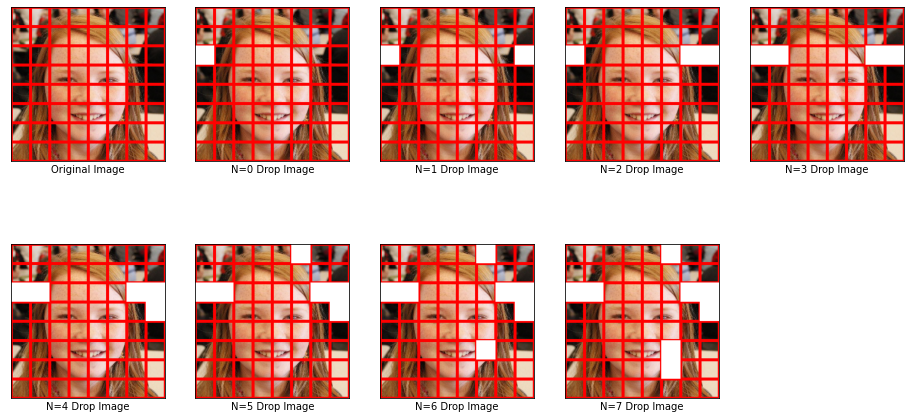

In [10]:
oriImg = img.copy()
lineImg = drawPATCH(img)
dropImg = nPATCHDrop(lineImg)
drawDropImg(lineImg)

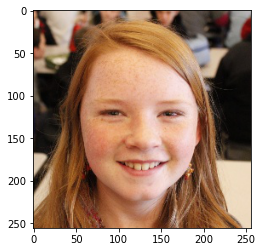

In [11]:
plt.imshow(img)

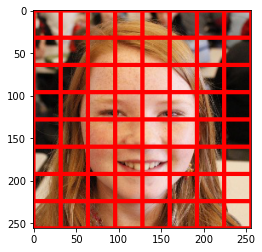

In [12]:
plt.imshow(lineImg)

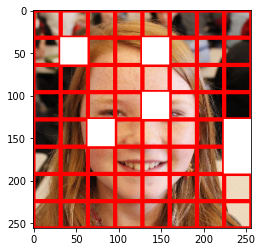

In [13]:
plt.imshow(dropImg)